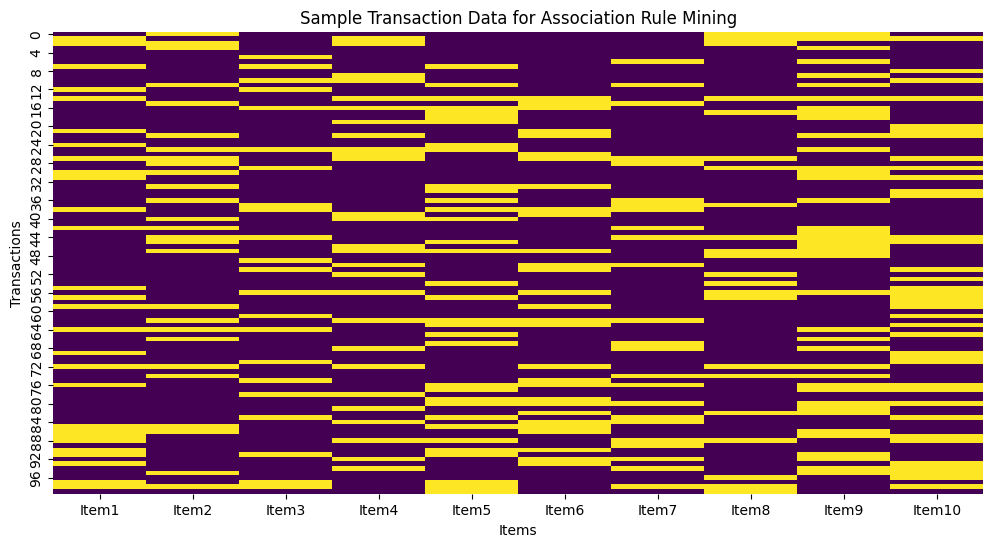

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


np.random.seed(0)
transaction_data = np.random.binomial(1, 0.3, size=(100, 10))  
transaction_df = pd.DataFrame(transaction_data, columns=[f'Item{i+1}' for i in range(10)])


plt.figure(figsize=(12, 6))
sns.heatmap(transaction_df, cmap="viridis", cbar=False)
plt.title('Sample Transaction Data for Association Rule Mining')
plt.xlabel('Items')
plt.ylabel('Transactions')
plt.show()


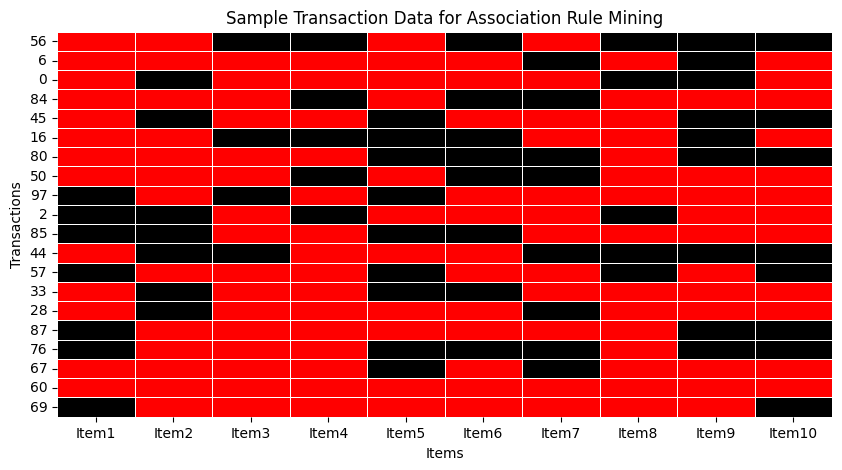

In [5]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



simple_df = transaction_df.sample(20)  


plt.figure(figsize=(10, 5))
sns.heatmap(simple_df, cmap=["red", "black"], cbar=False, linewidths=.5)
plt.title('Sample Transaction Data for Association Rule Mining')
plt.xlabel('Items')
plt.ylabel('Transactions')
plt.yticks(rotation=0) 
plt.show()


In [8]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# List of transactions
transactions = [
    ["electric car", "battery life", "expensive"],
    ["charging time", "second vehicle", "shopping trolley"],
    ["cold climate", "efficiency diminishes"],
    ["solid state batteries", "future technology"],
    ["jerrycan", "energy independence"],
    ["trailer", "extra battery", "road trip"],
    ["monthly subscription", "unlimited charging", "scandinavia"],
    ["charging stops", "long trips"],
    ["tax credit", "government subsidies", "infrastructure costs"],
    ["carbon emissions", "eco friendly"],
    ["tax increase", "original price", "CO2 emissions"],
    ["competition", "gas cars", "market share"],
    ["EV adoption", "public transport", "upgraded buses"],
    ["mass transit", "autonomous vehicles", "uber"],
    ["range increasing", "adequate for most", "price drop"]
]

=
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)


df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)


rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']])


                             antecedents  \
0                        (CO2 emissions)   
1                       (original price)   
2                        (CO2 emissions)   
3                         (tax increase)   
4                          (EV adoption)   
..                                   ...   
125  (monthly subscription, scandinavia)   
126    (unlimited charging, scandinavia)   
127               (monthly subscription)   
128                 (unlimited charging)   
129                        (scandinavia)   

                                    consequents   support  confidence  lift  
0                              (original price)  0.066667         1.0  15.0  
1                               (CO2 emissions)  0.066667         1.0  15.0  
2                                (tax increase)  0.066667         1.0  15.0  
3                               (CO2 emissions)  0.066667         1.0  15.0  
4                            (public transport)  0.066667         1.0  15.0  
.. 

In [10]:
# Sort by support
top_support = rules.nlargest(15, 'support')
print(top_support)
# Sort by confidence
top_confidence = rules.nlargest(15, 'confidence')
print(top_confidence)
# Sort by lift
top_lift = rules.nlargest(15, 'lift')
print(top_lift)

              antecedents            consequents  antecedent support  \
0         (CO2 emissions)       (original price)            0.066667   
1        (original price)        (CO2 emissions)            0.066667   
2         (CO2 emissions)         (tax increase)            0.066667   
3          (tax increase)        (CO2 emissions)            0.066667   
4           (EV adoption)     (public transport)            0.066667   
5      (public transport)          (EV adoption)            0.066667   
6           (EV adoption)       (upgraded buses)            0.066667   
7        (upgraded buses)          (EV adoption)            0.066667   
8     (adequate for most)           (price drop)            0.066667   
9            (price drop)    (adequate for most)            0.066667   
10    (adequate for most)     (range increasing)            0.066667   
11     (range increasing)    (adequate for most)            0.066667   
12         (mass transit)  (autonomous vehicles)            0.06

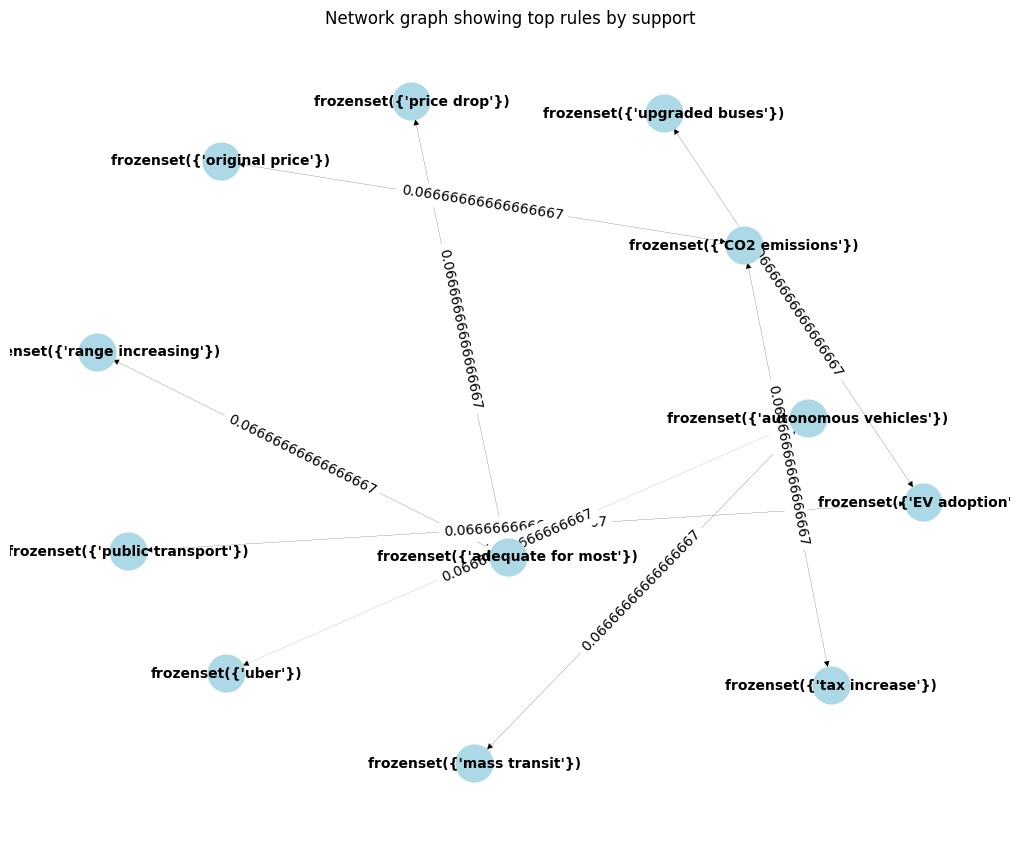

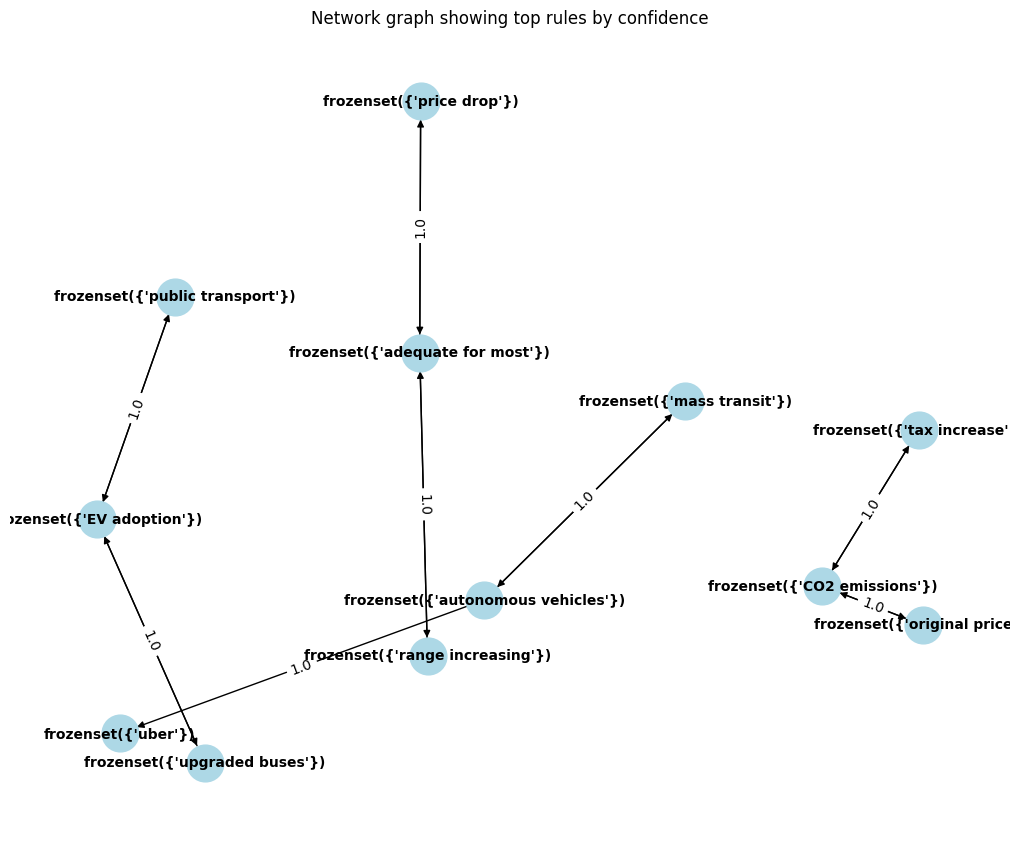

In [11]:
import networkx as nx

s
def plot_network_graph(rules, metric):
    G = nx.DiGraph()

    for _, row in rules.iterrows():
        G.add_edge(str(row['antecedents']), str(row['consequents']), weight=row[metric])

    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G, k=1)  # k regulates the distance between nodes
    nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, 
            node_color='lightblue', font_size=10, width=list(nx.get_edge_attributes(G, 'weight').values()))
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(f'Network graph showing top rules by {metric}')
    plt.show()

# Visualize the top rules by support
plot_network_graph(top_support, 'support')

# Visualize the top rules by confidence or lift
plot_network_graph(top_confidence, 'confidence')  # Replace 'confidence' with 'lift' if needed


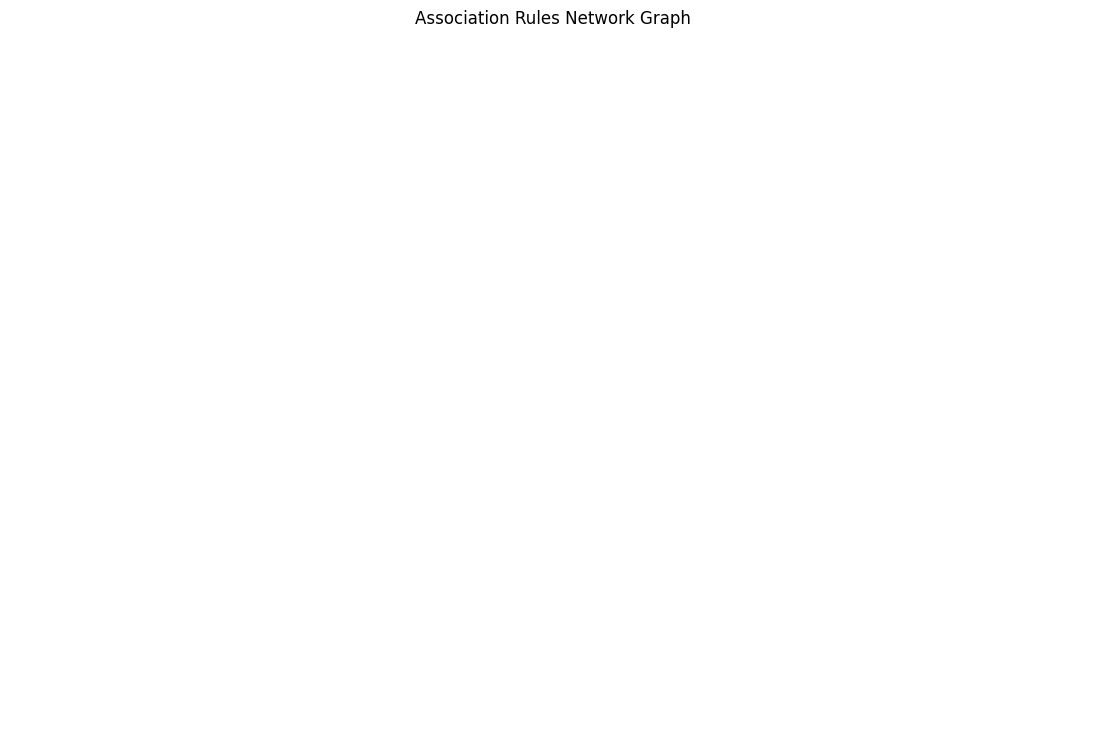

In [13]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import networkx as nx
import matplotlib.pyplot as plt

# Define the transactions
transactions = [
    ["electric car", "battery life", "expensive"],
    ["charging time", "second vehicle", "shopping trolley"],
    ["cold climate", "efficiency diminishes"],
    ["solid state batteries", "future technology"],
    ["jerrycan", "energy independence"],
    ["trailer", "extra battery", "road trip"],
    ["monthly subscription", "unlimited charging", "scandinavia"],
    ["charging stops", "long trips"],
    ["tax credit", "government subsidies", "infrastructure costs"],
    ["carbon emissions", "eco friendly"],
    ["tax increase", "original price", "CO2 emissions"],
    ["competition", "gas cars", "market share"],
    ["EV adoption", "public transport", "upgraded buses"],
    ["mass transit", "autonomous vehicles", "uber"],
    ["range increasing", "adequate for most", "price drop"]
]


te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

G = nx.DiGraph()

for _, row in rules.iterrows():
    antecedents = tuple(row['antecedents'])
    consequents = tuple(row['consequents'])
    support = row['support']
    confidence = row['confidence']
    lift = row['lift']

    if support > 0.1: 
        G.add_edge(antecedents, consequents, weight=lift)

# Generate plot
plt.figure(figsize=(14, 9))

# Positions for all nodes
pos = nx.spring_layout(G, k=0.15, iterations=20)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# Edges
edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

# Labels
nx.draw_networkx_labels(G, pos, font_size=12)

# Edge labels
edge_labels = {(u, v): d['weight'] for u, v, d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=9)

# Plot the network graph
plt.title('Association Rules Network Graph')
plt.axis('off')
plt.show()
